In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Reading data into pandas dataframe
breast_cancer_df=pd.read_csv(r"/Users/subhashreddy/Downloads/data_set.csv")
breast_cancer_df_org=pd.read_csv(r"/Users/subhashreddy/Downloads/data_set.csv")

In [6]:
breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# How many attributed does it include?

- From the below ouput Total columns is 33 and which column 'Unnamed: 32' doesn't have any values
- So Total attributes= 32

In [9]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Assigning target variable to y 
breast_cancer_df['diagnosis'] = breast_cancer_df['diagnosis'].map({'M':1,'B':0})
y=breast_cancer_df['diagnosis']
breast_cancer_df.drop(columns=['Unnamed: 32','diagnosis','id'],inplace=True) # Dropping unknown and target columns
breast_cancer_df_org.drop(columns=['Unnamed: 32'],inplace=True) # Dropping only unknown columns

# How many malignant cases (M) and benign cases (B) are there?
- Number of Malignant Cases= 212
- Number of Benign Cases= 357

In [11]:
y.value_counts() # counting values In B and M

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

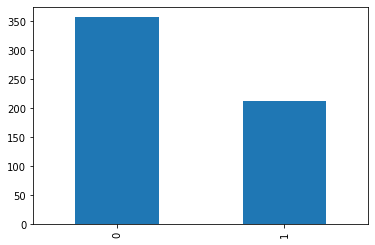

In [12]:
y.value_counts().plot(kind='bar')

# For each real attribute find its mean, variance, standard deviation and mean, then find mean, variance and standard deviation in for each attribute in each class ?

# Mean of all attributes

In [13]:
breast_cancer_df_mean=breast_cancer_df.mean(axis=0)
print(breast_cancer_df_mean)

radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_worst            0.254265
concavity_wo

# Varaince of all attributes

In [14]:
breast_cancer_df_var=breast_cancer_df.var(axis=0)
print(breast_cancer_df_var)

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

# Standard deviation of all attributes

In [15]:
breast_cancer_df_std=breast_cancer_df.std(axis=0)
print(breast_cancer_df_std)

radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_worst            0.157336
concavity_wo

In [16]:
#creating a seperate dataframe for malignant(M)
breast_cancer_df_M=breast_cancer_df_org[breast_cancer_df_org['diagnosis']=='M']
print(breast_cancer_df_M.shape)
breast_cancer_df_M.head()

(212, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
#creating a seperate dataframe for benign(B)
breast_cancer_df_B=breast_cancer_df_org[breast_cancer_df_org['diagnosis']=='B']
print(breast_cancer_df_B.shape)
breast_cancer_df_B.head()

(357, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


# Mean for each attribute in class Malignant(M)

In [18]:
breast_cancer_df_mean_M=breast_cancer_df_M.mean(axis=0)
print(breast_cancer_df_mean_M)

id                         3.681805e+07
radius_mean                1.746283e+01
texture_mean               2.160491e+01
perimeter_mean             1.153654e+02
area_mean                  9.783764e+02
smoothness_mean            1.028985e-01
compactness_mean           1.451878e-01
concavity_mean             1.607747e-01
concave points_mean        8.799000e-02
symmetry_mean              1.929090e-01
fractal_dimension_mean     6.268009e-02
radius_se                  6.090825e-01
texture_se                 1.210915e+00
perimeter_se               4.323929e+00
area_se                    7.267241e+01
smoothness_se              6.780094e-03
compactness_se             3.228117e-02
concavity_se               4.182401e-02
concave points_se          1.506047e-02
symmetry_se                2.047240e-02
fractal_dimension_se       4.062406e-03
radius_worst               2.113481e+01
texture_worst              2.931821e+01
perimeter_worst            1.413703e+02
area_worst                 1.422286e+03


# Variance for each attribute in class Malignant(M)

In [19]:
breast_cancer_df_var_M=breast_cancer_df_M.var(axis=0)
print(breast_cancer_df_var_M)

id                         1.901546e+16
radius_mean                1.026543e+01
texture_mean               1.428439e+01
perimeter_mean             4.776259e+02
area_mean                  1.353784e+05
smoothness_mean            1.589676e-04
compactness_mean           2.914650e-03
concavity_mean             5.627900e-03
concave points_mean        1.181566e-03
symmetry_mean              7.638641e-04
fractal_dimension_mean     5.735510e-05
radius_se                  1.190516e-01
texture_se                 2.334611e-01
perimeter_se               6.597427e+00
area_se                    3.764469e+03
smoothness_se              8.354585e-06
compactness_se             3.380888e-04
concavity_se               4.667081e-04
concave points_se          3.044129e-05
symmetry_se                1.013020e-04
fractal_dimension_se       4.167714e-06
radius_worst               1.834897e+01
texture_worst              2.953710e+01
perimeter_worst            8.677181e+02
area_worst                 3.575654e+05


# Standard Deviation for each attribute in class Malignant(M)

In [20]:
breast_cancer_df_std_M=breast_cancer_df_M.std(axis=0)
print(breast_cancer_df_std_M)

id                         1.378965e+08
radius_mean                3.203971e+00
texture_mean               3.779470e+00
perimeter_mean             2.185465e+01
area_mean                  3.679380e+02
smoothness_mean            1.260824e-02
compactness_mean           5.398750e-02
concavity_mean             7.501933e-02
concave points_mean        3.437391e-02
symmetry_mean              2.763809e-02
fractal_dimension_mean     7.573315e-03
radius_se                  3.450386e-01
texture_se                 4.831781e-01
perimeter_se               2.568546e+00
area_se                    6.135527e+01
smoothness_se              2.890430e-03
compactness_se             1.838719e-02
concavity_se               2.160343e-02
concave points_se          5.517362e-03
symmetry_se                1.006489e-02
fractal_dimension_se       2.041498e-03
radius_worst               4.283569e+00
texture_worst              5.434804e+00
perimeter_worst            2.945706e+01
area_worst                 5.979677e+02


# Mean for each attribute in class Benign(B)

In [21]:
breast_cancer_df_mean_B=breast_cancer_df_B.mean(axis=0)
print(breast_cancer_df_mean_B)

id                         2.654382e+07
radius_mean                1.214652e+01
texture_mean               1.791476e+01
perimeter_mean             7.807541e+01
area_mean                  4.627902e+02
smoothness_mean            9.247765e-02
compactness_mean           8.008462e-02
concavity_mean             4.605762e-02
concave points_mean        2.571741e-02
symmetry_mean              1.741860e-01
fractal_dimension_mean     6.286739e-02
radius_se                  2.840824e-01
texture_se                 1.220380e+00
perimeter_se               2.000321e+00
area_se                    2.113515e+01
smoothness_se              7.195902e-03
compactness_se             2.143825e-02
concavity_se               2.599674e-02
concave points_se          9.857653e-03
symmetry_se                2.058381e-02
fractal_dimension_se       3.636051e-03
radius_worst               1.337980e+01
texture_worst              2.351507e+01
perimeter_worst            8.700594e+01
area_worst                 5.588994e+02


# Variance for each attribute in class Benign(B)

In [22]:
breast_cancer_df_var_B=breast_cancer_df_B.var(axis=0)
print(breast_cancer_df_var_B)

id                         1.362815e+16
radius_mean                3.170222e+00
texture_mean               1.596102e+01
perimeter_mean             1.394156e+02
area_mean                  1.803303e+04
smoothness_mean            1.807970e-04
compactness_mean           1.139059e-03
concavity_mean             1.887220e-03
concave points_mean        2.530892e-04
symmetry_mean              6.153753e-04
fractal_dimension_mean     4.552664e-05
radius_se                  1.267192e-02
texture_se                 3.471328e-01
perimeter_se               5.947019e-01
area_se                    7.820700e+01
smoothness_se              9.367331e-06
compactness_se             2.673719e-04
concavity_se               1.083610e-03
concave points_se          3.258840e-05
symmetry_se                4.897954e-05
fractal_dimension_se       8.633131e-06
radius_worst               3.925817e+00
texture_worst              3.018354e+01
perimeter_worst            1.829822e+02
area_worst                 2.676543e+04


# Standard deviation for each attribute in class Benign(B)

In [69]:
breast_cancer_df_std_B=breast_cancer_df_B.std(axis=0)
print(breast_cancer_df_std_B)

id                         1.167397e+08
radius_mean                1.780512e+00
texture_mean               3.995125e+00
perimeter_mean             1.180744e+01
area_mean                  1.342871e+02
smoothness_mean            1.344608e-02
compactness_mean           3.374995e-02
concavity_mean             4.344215e-02
concave points_mean        1.590878e-02
symmetry_mean              2.480676e-02
fractal_dimension_mean     6.747343e-03
radius_se                  1.125696e-01
texture_se                 5.891797e-01
perimeter_se               7.711692e-01
area_se                    8.843472e+00
smoothness_se              3.060610e-03
compactness_se             1.635151e-02
concavity_se               3.291824e-02
concave points_se          5.708625e-03
symmetry_se                6.998539e-03
fractal_dimension_se       2.938219e-03
radius_worst               1.981368e+00
texture_worst              5.493955e+00
perimeter_worst            1.352709e+01
area_worst                 1.636014e+02


# Are the attributes normalised?

From the Histograms It is clear that attributes are not normalised

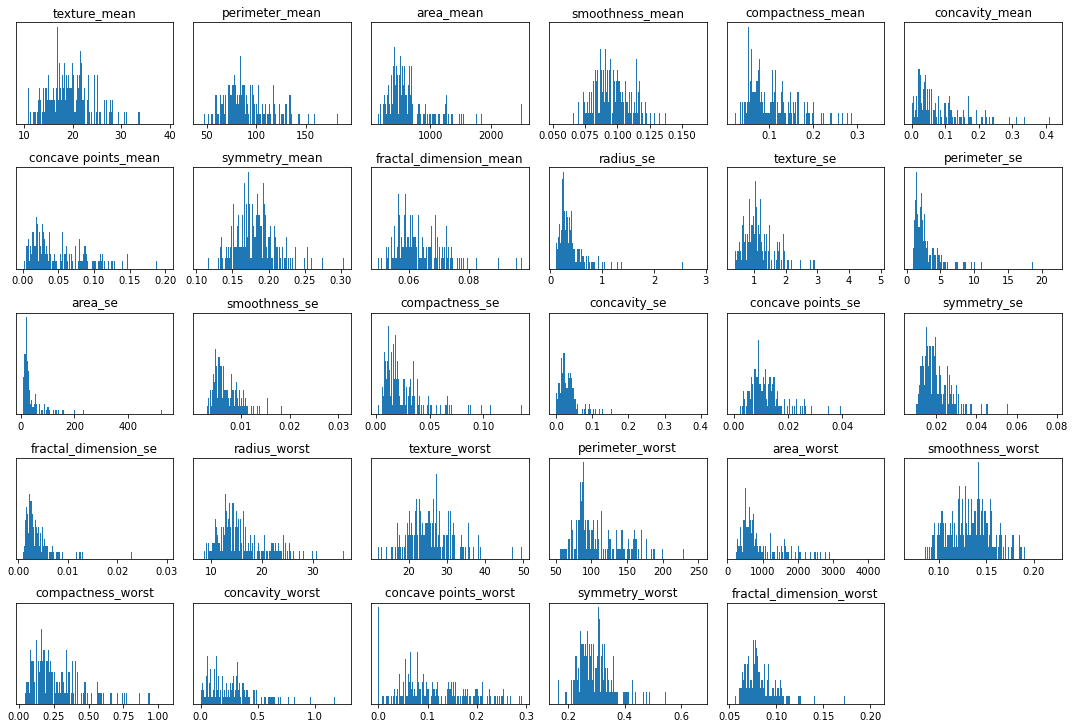

In [65]:
fig = plt.figure(figsize=(15, 12))

for i in range(1, breast_cancer_df.shape[1]): # looping through all the features and plotting histogram
    plt.subplot(6, 6, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(breast_cancer_df.columns.values[i])
    vals = np.size(breast_cancer_df.iloc[:, i].unique())
    plt.hist(breast_cancer_df.iloc[:, i], bins=vals)  # plotting histogram

plt.tight_layout()

In [72]:
#normalising the given data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
breast_cancer_df_scaled_data = pd.DataFrame(scaler.fit_transform(breast_cancer_df), columns=breast_cancer_df.columns)

In [73]:
#finding mean,var,std after normalising the data
scaled_data=pd.DataFrame()
scaled_data["mean"]=breast_cancer_df_scaled_data.mean()
scaled_data["var"]=breast_cancer_df_scaled_data.var()
print(scaled_data)

                             mean       var
radius_mean              0.338222  0.027818
texture_mean             0.323965  0.021156
perimeter_mean           0.332935  0.028195
area_mean                0.216920  0.022283
smoothness_mean          0.394785  0.016121
compactness_mean         0.260601  0.026242
concavity_mean           0.208058  0.034889
concave points_mean      0.243137  0.037194
symmetry_mean            0.379605  0.019170
fractal_dimension_mean   0.270379  0.022112
radius_se                0.106345  0.010084
texture_se               0.189324  0.014864
perimeter_se             0.099376  0.009076
area_se                  0.062636  0.007219
smoothness_se            0.181119  0.010418
compactness_se           0.174439  0.018090
concavity_se             0.080540  0.005811
concave points_se        0.223454  0.013662
symmetry_se              0.178143  0.013529
fractal_dimension_se     0.100193  0.008357
radius_worst             0.296663  0.029563
texture_worst            0.36399

# Try to create predictors by one attribute. For this purpose, create histograms for each attribute and each class and select the best threshold a for each attribute x for the decision rule: if x>a then one class (B or M) and if x<a then another class (M or B) (the optimal cut). Find the classification error for each attribute. Which attribute gives the best prediction? Arrange the attributes in their prediction ability

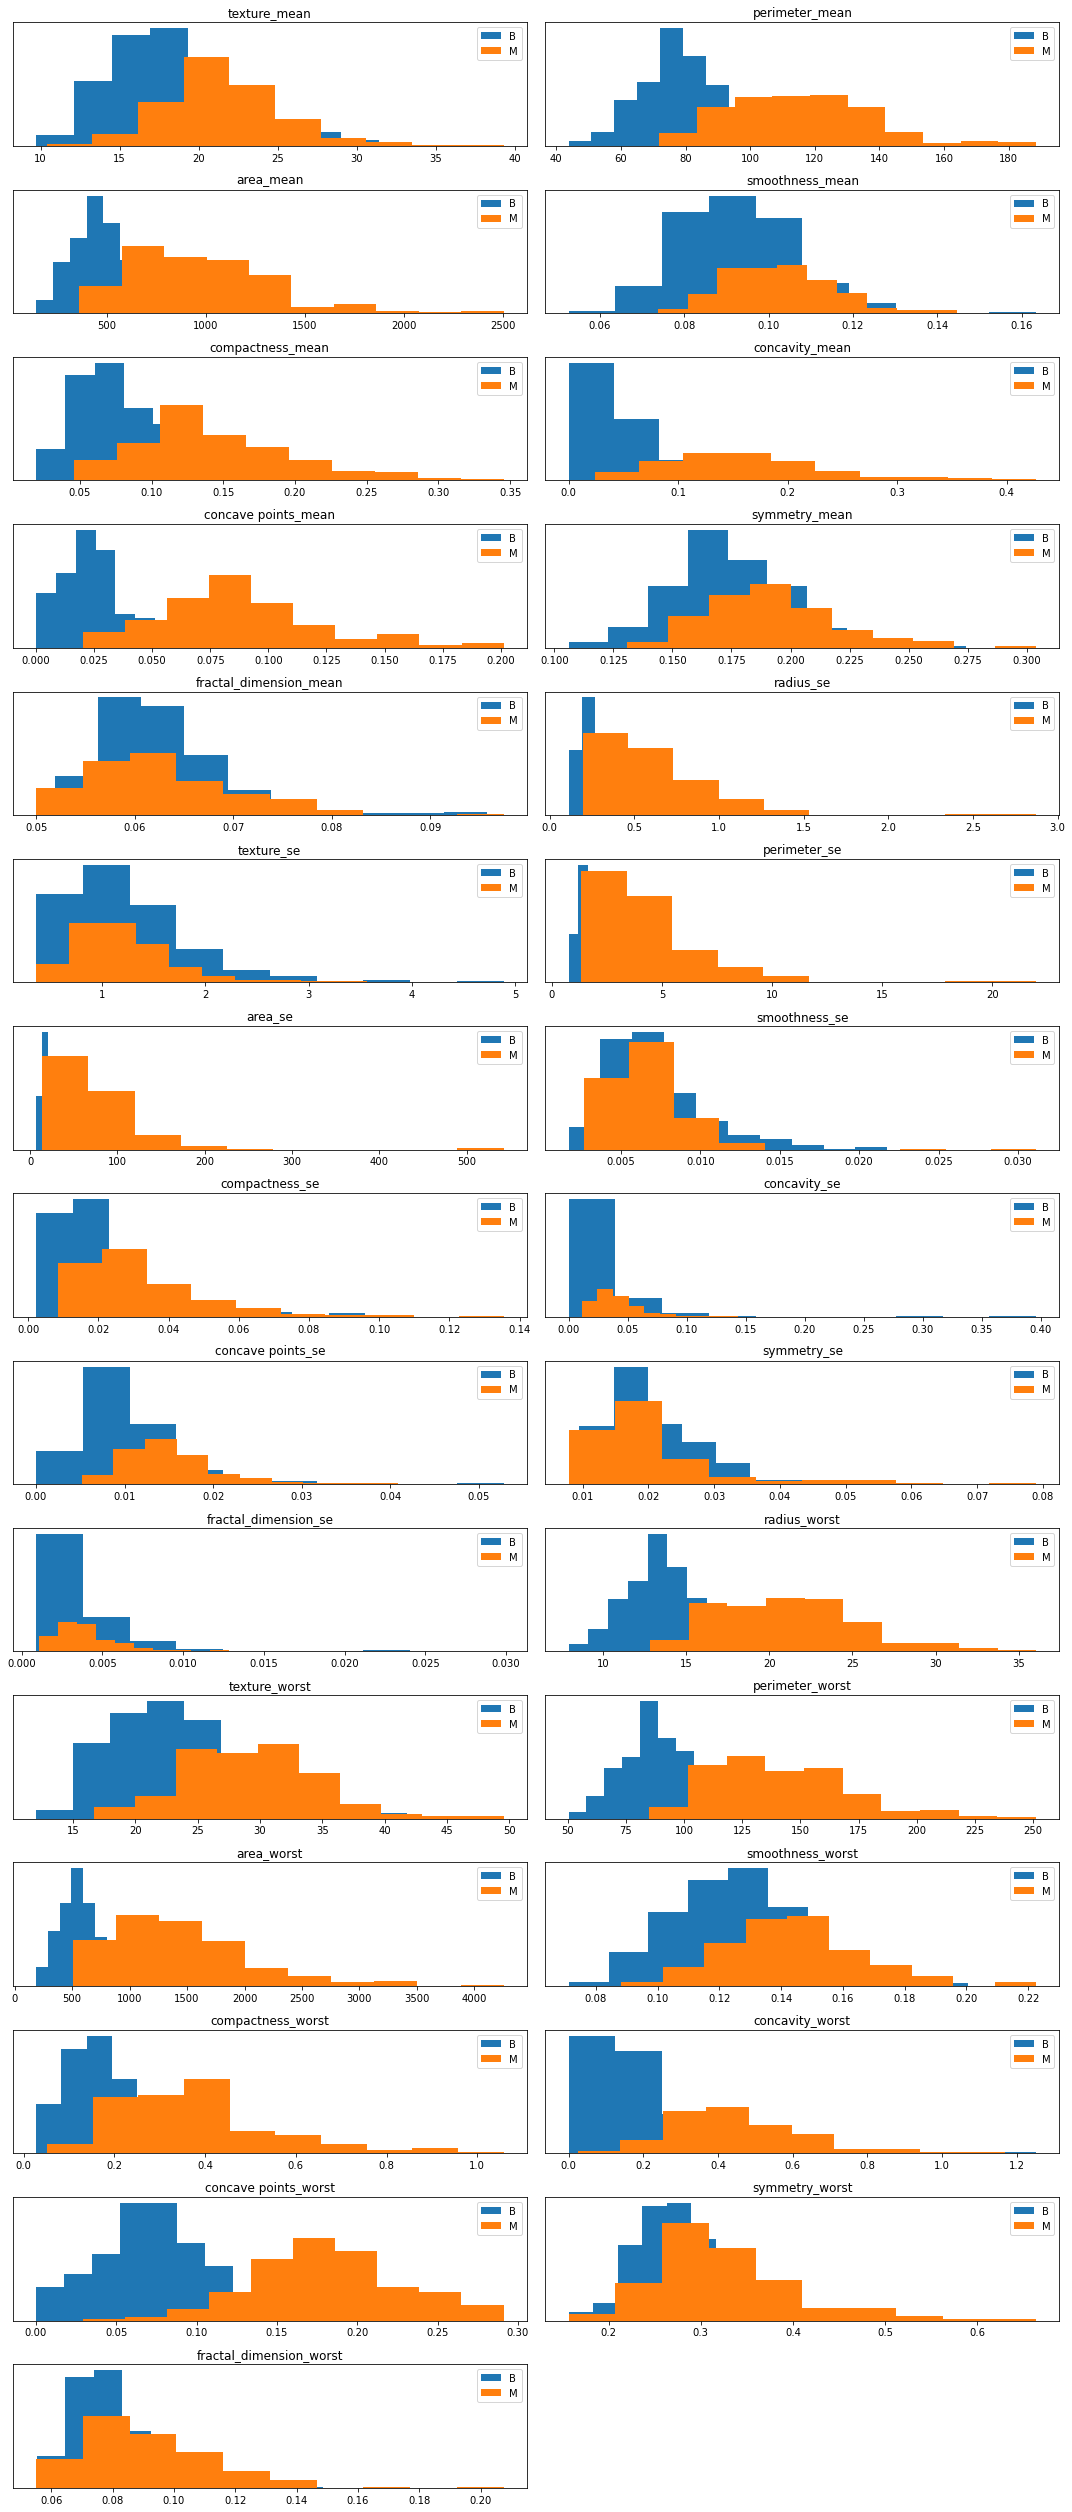

In [54]:
fig = plt.figure(figsize=(15, 35))

for i in range(1, breast_cancer_df.shape[1]): # Loppping through all the atributes
    plt.subplot(15, 2, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(breast_cancer_df.columns.values[i])
    plt.hist(breast_cancer_df_B[breast_cancer_df.columns.values[i]]) # plotting histogram with class B
    plt.hist(breast_cancer_df_M[breast_cancer_df.columns.values[i]]) # plotting histogram with claa M
    plt.legend(["B", "M"])
    plt.tight_layout()


In [74]:
def classification_error(feature,threshold,y):
    greater_class='M'
    wrong_count=0
    for i,j in zip(breast_cancer_df[feature],y):
        if(i>=threshold and j!=greater_class):
            wrong_count=wrong_count+1
        elif(i<threshold and j==greater_class):
            wrong_count=wrong_count+1   
        else:
            continue
    return wrong_count/breast_cancer_df.shape[0]

In [59]:
classification_error_list=pd.DataFrame(columns=['Feature','best_classification_error','best_threshold','greater_class'])
i=0
threshold_list=[ 0,15,20,100,500,0.12,0.10,0.1,0.050,0.225,0.07,0.3,3,1,10,0.025,0.02,0.15,0.015,0.04,0.10,15,25,100,700,0.14,0.2,0.2,0.10,0.3,0.08]
for feature in breast_cancer_df.columns:
    best_classification_error=classification_error(feature,threshold_list[i],y)
    classification_error_list=classification_error_list.append({'Feature':feature,'best_classification_error':best_classification_error,'best_threshold':threshold_list[i],'greater_class':'M'},ignore_index=True)
    i=i+1

classification_error_list.head(35)

,Feature,best_classification_error,best_threshold,greater_class
0,radius_mean,1.000000,0,M
1,texture_mean,0.840070,15,M
2,perimeter_mean,1.000000,20,M
3,area_mean,1.000000,100,M
4,smoothness_mean,0.000000,500,M
5,compactness_mean,0.314587,0.12,M
6,concavity_mean,0.344464,0.1,M
7,concave points_mean,0.103691,0.1,M
8,symmetry_mean,1.000000,0.05,M
9,fractal_dimension_mean,0.000000,0.225,M


In [76]:
classification_error_list.loc[classification_error_list['best_classification_error'].idxmin(),'Feature']

'smoothness_mean'

In [77]:
classification_error_list.sort_values('best_classification_error')

,Feature,best_classification_error,best_threshold,greater_class
14,smoothness_se,0.000000,10,M
24,smoothness_worst,0.000000,700,M
19,fractal_dimension_se,0.000000,0.04,M
17,concave points_se,0.000000,0.15,M
9,fractal_dimension_mean,0.000000,0.225,M
29,fractal_dimension_worst,0.000000,0.3,M
4,smoothness_mean,0.000000,500,M
7,concave points_mean,0.103691,0.1,M
27,concave points_worst,0.126538,0.2,M
12,perimeter_se,0.314587,3,M


# Test 1NN and 3NN classification rules. Present the classification errors. Which rule is better? (Use the normalised attributes)

3KNN gives better accuracy

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [79]:

X=np.array(breast_cancer_df_scaled_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [80]:
clf_1 = KNeighborsClassifier(n_neighbors = 1, metric='minkowski', p=2)
clf_1.fit(X_train, y_train) 
y_pred_1 = clf_1.predict(X_test)
confusion_matrics_1 = confusion_matrix(y_test, y_pred_1)
print("\nConfusion_matrics_1:")
print(confusion_matrics_1)
test_score_1= accuracy_score(y_test, y_pred_1)
print("\nAccuracy :",test_score_1*100)
Error_1NN = (1-test_score_1)*100
print("\nError for 1NN :", Error_1NN)



Confusion_matrics_1:
[[85  5]
 [ 4 49]]

Accuracy : 93.7062937062937

Error for 1NN : 6.2937062937062915


In [81]:
clf_3 = KNeighborsClassifier(n_neighbors = 3, metric='minkowski', p=2) 
clf_3.fit(X_train, y_train) 
y_pred_3 = clf_3.predict(X_test)
confusion_matrics_3 = confusion_matrix(y_test, y_pred_3)
print("\nConfusion_matrics_3:")
print(confusion_matrics_3)
test_score_3= accuracy_score(y_pred_3, y_test)
print("\nAccuracy :",test_score_3*100)
Error_3NN = (1-test_score_3)*100
print("\nError for 3NN :", Error_3NN)


Confusion_matrics_3:
[[88  2]
 [ 5 48]]

Accuracy : 95.1048951048951

Error for 3NN : 4.895104895104896


# Apply Fisher’s linear discriminant to the Breast Cancer Wisconsin (Diagnostic) data set. Analyse the quality of classification. Compare to 1NN and 3NN methods.

Comparing to 1NN and 3NN,Fisher's linear discriminant gives the best Accuracy.

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train) 
y_pred_LDA = clf.predict(X_test)
confusion_matrics_LDA = confusion_matrix(y_test, y_pred_LDA)
print("\nConfusion_matrics_LDA:")
print(confusion_matrics_LDA)
test_score_LDA= accuracy_score(y_pred_LDA, y_test)
print("\nAccuracy :",test_score_LDA*100)
Error_LDA = (1-test_score_LDA)*100
print("\nError for LDA :", Error_LDA)


Confusion_matrics_LDA:
[[90  0]
 [ 4 49]]

Accuracy : 97.2027972027972

Error for LDA : 2.7972027972028024


In [89]:
from sklearn.linear_model import LinearRegression
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(X_train,y_train)

y_pred_LR = simple_linear_regression.predict(X_test)
test_score_LDA = accuracy_score(y_pred_LR, y_test)

# print("LR accuracy : {:.2f}%".format(simple_linear_regression.score(X_test,y_test)*100))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [90]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train,y_train)
print("SVC accuracy : {:.2f}%".format(svm.score(X_test,y_test)*100))

SVC accuracy : 97.20%
